In [1]:
import requests
import collections
import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
req = requests.get('https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_pge&srchby=all&st=sim&where=post&start=1')

In [33]:
html = req.text
header = req.headers

In [34]:
status = req.status_code
status

200

In [35]:
from bs4 import BeautifulSoup

In [36]:
soup = BeautifulSoup(html, 'html.parser')

In [121]:
s = []
for page in range(1, 100, 10):
    raw = requests.get('https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_pge&srchby=all&st=sim&where=post&start='+str(page),
                         headers = {"User-Agent" : "Mozilla/5.0"})
    html = BeautifulSoup(raw.text, 'html.parser')


    article = html.select('ul.type01 > li')

    
    for ar in article:

        title = ar.select_one("ul.type01 > li a.sh_blog_title._sp_each_url._sp_each_title").text
        s += [title]

In [123]:
from collections import Counter

In [157]:
with open("corona.txt", "w") as output:
    output.write(str(s))

In [204]:
my_file = open("/Users/kimginam/Kaggle/corona.txt", "r")
content = my_file.read()

In [205]:
content = content.split(',')
content = str(content)

In [206]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = '코로나 2020 위한 차이는' 
stop_words = stop_words.split(' ')

word_tokens = word_tokenize(content)


result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
result = str(result)

In [207]:
words = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', result)

In [208]:
word_tokens = word_tokenize(words)

In [209]:
words = collections.Counter(word_tokens)
words = dict(words)

In [210]:
words = dict(sorted(words.items(), key=operator.itemgetter(1),reverse=True))

In [211]:
keys_to_remove = ["코로나", "\\\\",'코로나19로','코로나19','25단계','극복','쓰면','이유는','이후의']
for key in keys_to_remove:
    words.pop(key)

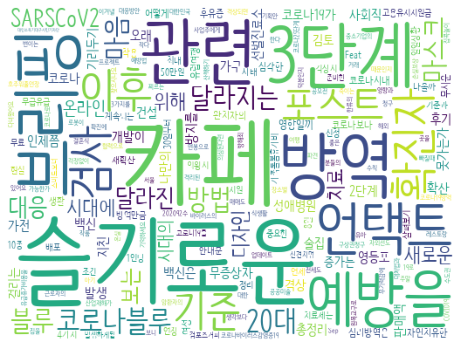

In [212]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(font_path = '/Users/kimginam/Downloads/NanumBarunpenR.ttf',
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(words))
plt.rcParams['font.family'] = 'AppleGothic'
plt.imshow(wordcloud)
plt.axis('off')

plt.show()